## NOTEBOOK 1
**TEAM MEMBERS :-** <br/>
**1. Lacey Hamilton**<br/>
**2. Megha Viswanath**<br/>
**3. Yena Hong**

### INITIAL DATA ANALYSIS WITH OUR ENTIRE DATASET

#### 1. DATASET FORMATION

In [1]:
## All Library imports for the entire project given here
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

In [2]:
def process_folder(folder_path, malware_type):
    all_files = []
    
    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path)
            df["Malware_Type"] = malware_type
            all_files.append(df)
    
    concatenated_df = pd.concat(all_files, ignore_index=True)
    return concatenated_df


In [130]:
folders_and_types = [
    ("Adware/", "ADWARE"),
    ("Ransomware/", "RANSOMWARE"),
    ("Scareware/", "SCAREWARE"),
    ("SMSmalware/", "SMSMALWARE")
]


In [131]:
all_data = []

for folder, malware_type in folders_and_types:
    processed_data = process_folder(folder, malware_type)
    all_data.append(processed_data)

df = pd.concat(all_data, ignore_index=True)


In [132]:
df.head(2)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Malware_Type
0,10.42.0.151-31.13.71.1-57050-443-6,31.13.71.1,443.0,10.42.0.151,57050.0,6.0,13/06/2017 03:16:08,15.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_EWIND,ADWARE
1,10.42.0.151-31.13.71.1-57050-443-6,10.42.0.151,57050.0,31.13.71.1,443.0,6.0,13/06/2017 03:16:08,10067.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_EWIND,ADWARE


In [133]:
df.shape

(1411064, 86)

## Data Cleaning

### 1. First check for NaN values

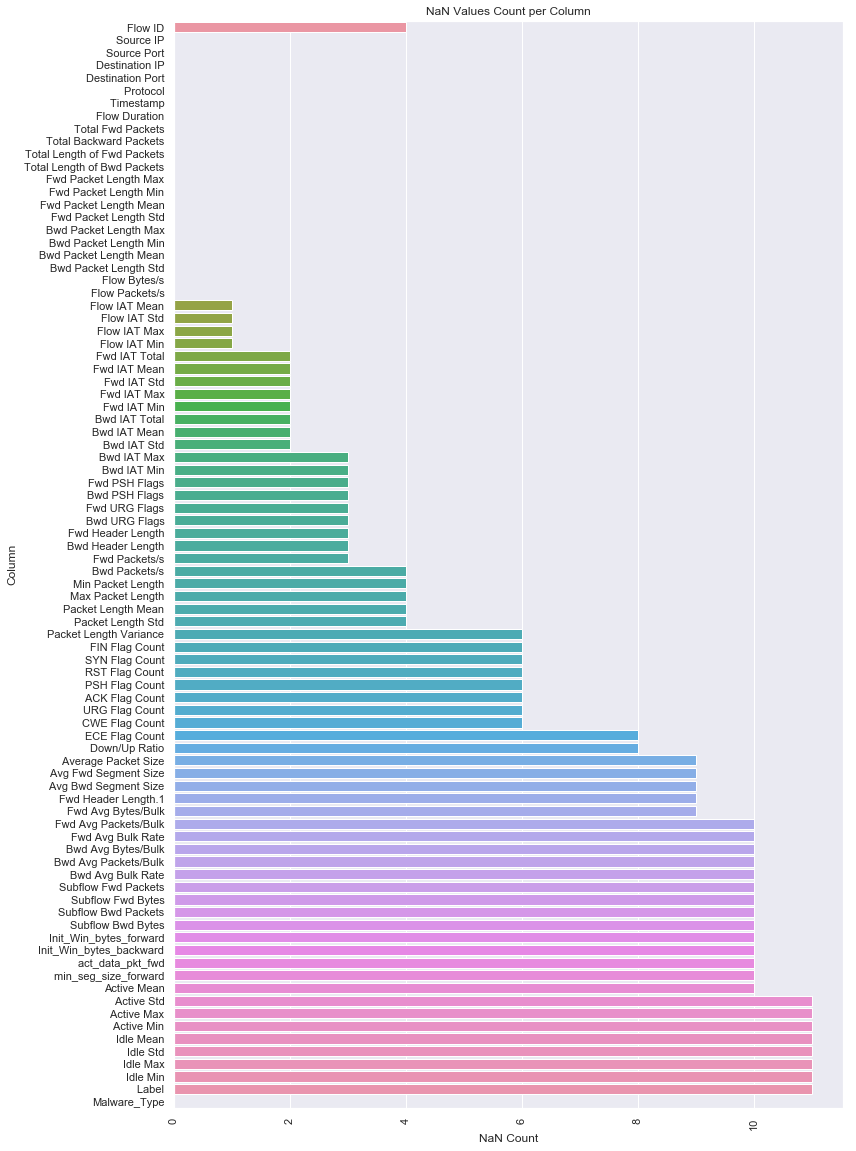

In [134]:
nan_count = df.isnull().sum()
nan_count_df = nan_count.reset_index()
nan_count_df.columns = ['Column', 'NaN Count']
plt.figure(figsize=(12, 20))
sns.set(style="darkgrid")
ax = sns.barplot(y="Column", x="NaN Count", data=nan_count_df)
plt.xticks(rotation=90)
plt.title("NaN Values Count per Column")
plt.show()

From the graph above, we see that the NaN values are not more than 10 for these columns, let us now see, how much of the NaN values occur in the same row

In [135]:
df[df.isnull().any(axis=1)]

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Malware_Type
1150028,6923,291380.770637023,1045267.0,17,1.328159e+06,442719.666667,534188.743461834,1045267.0,27165.0,1.319105e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SCAREWARE
1171886,666666666,0,80.0,0,0.000000e+00,0.000000,0,0.0,0.0,3.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SCAREWARE
1189524,NaN,0,0.0,0,0.000000e+00,0.000000,0,0.0,0.0,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SMSMALWARE
1205158,172.217.10.238-10.42.0.151-443-50096-6,10.42.0.151,50096.0,172.217.10.238,4.430000e+02,6.000000,30/06/2017 10:35:52,37222.0,1.0,1.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SMSMALWARE
1298372,NaN,281.0,124560.0,17794.285714285714,2.884435e+04,65812.000000,3.0,0.0,0.0,0.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SMSMALWARE
1299482,10.42.0.42-103.235.46.212-52952-443-6,10.42.0.42,52952.0,103.235.46.212,4.430000e+02,6.000000,23/06/2017 04:49:01,68856209.0,3.0,0.000000e+00,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SMSMALWARE
1301931,NaN,10.42.0.211,33012.0,219.142.78.162,4.430000e+02,6.000000,26/06/2017 06:54:47,7461249.0,3.0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SCAREWARE,SMSMALWARE
1302199,182.254.5.234-10.42.0.211-80-59013-6,10.42.0.211,59013.0,182.254.5.234,8.000000e+01,6.000000,26/06/2017 06:56:09,61078257.0,6.0,5.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SMSMALWARE
1306617,NaN,0,0.0,432,3.200000e+02,0.312494,0.2389661164061305,0.0,1340.0,1.547742e+02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SMSMALWARE
1308956,10.42.0.151-10.42.0.1-12888-53-17,10.42.0.151,12888.0,10.42.0.1,5.300000e+01,17.000000,26/06/2017 01:33:19,49283.0,1.0,1.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SMSMALWARE


We see that the NaN values of these rows are not spread across the data. And because of the sheer volume of the original data, we decided to drop these 12 rows, since it wouldnt create much of an impact on our model.

In [136]:
df = df.dropna()

In [137]:
df.shape

(1411052, 86)

As we were parsing through the individual columns of the dataset, we noticed the protocol being a categorical variable contained numerical data. Based on domain knowledge of one the experts we contacted from the cyber security team, we understood that we various protocols like TCP and UDP in place. Deciding to look at the values more in depth,

In [138]:
#df.info()
df[' Protocol'].value_counts()

6.0     1092214
17.0     310179
0.0        8659
Name:  Protocol, dtype: int64

We realised that these numbers represent the protocol numbers that are defined by the Internet Assigned Numbers Authority (IANA). 
- 6 represents TCP (Transmission Control Protocol)
- 17 represents UDP (User Datagram Protocol)
- 0 represents HOPOPT (IPv6 Hop-by-Hop Option)


For easier access of the columns, we decided to remove all unecessary spaces from their names

In [139]:
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [140]:
######################################### Uncomment this later ####################################################
#df.info()

On inspecting the above dataset, we see that the column 'Fwd_Header_Length' has a duplicate column 'Fwd_Header_Length.1'
On comparing the values we found they are exactly the same.

In [141]:
#Check if the number of same values between teh two columns equals the number of rows in the dataframe
if df.shape[0] == len(np.where(df.iloc[:, 40] == df.iloc[:, 61])[0]):
    print("The values in both the columns are same.")
else:
    print("The values do not match. Hence we can not assume both the columns have same values.")


The values in both the columns are same.


Thus we are dropping one of the duplicates:

In [142]:
df = df.drop(df.columns[61], axis=1)

Also we noticed some of the rows are of type Object, we decided to dig through these rows, because their counterparts seem to have float_type, thus the same type of data but for the opposite direction of flow having different data type did not make sense. Also working with object types with models might be a bit tedious if most of the columns are allready numerical. Below code displays all such columns:

In [143]:
df.select_dtypes(exclude='number').columns

Index(['Flow_ID', 'Source_IP', 'Destination_IP', 'Timestamp', 'Flow_IAT_Min',
       'Packet_Length_Std', 'CWE_Flag_Count', 'Down/Up_Ratio',
       'Fwd_Avg_Bytes/Bulk', 'Label', 'Malware_Type'],
      dtype='object')

In [144]:
df.head(1)

,Flow_ID,Source_IP,Source_Port,Destination_IP,Destination_Port,Protocol,Timestamp,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,...,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Malware_Type
0,10.42.0.151-31.13.71.1-57050-443-6,31.13.71.1,443.0,10.42.0.151,57050.0,6.0,13/06/2017 03:16:08,15.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE_EWIND,ADWARE


As shown above, the Flow_ID column is nothing but a combination of Destination_IP - Source_IP - Destination_Port - Source_Port - Protocol. Thus dropping this column.<br/>

In [145]:
#Keep a backup of the dataframe with IP addresses incase you are able to trace the location.
location_df = df

In [146]:
df = df.drop("Flow_ID", axis=1)

Also , the source port and destination port can be helpful in identifying certain types of traffic, such as well-known protocols - which is allready given by the Protocol column, however they are not reliable indicators of the presence of malware. And the numbered value can be treated as categorical values only. We can not interpret the numbers as such directly.

In [147]:
unique_values = df['Source_Port'].nunique()
print(unique_values)

63740


As seen above there are too many values to be used as a categorical column as well. Hence dropping the ports makes sense.<br/>
Also the IP address can only help us trace the location, but only if they are originating from public network. If they are originating from private network, then we can not trace the location using any kind of API. Thus tracing the locations using API calls for such large data is also limited. Hence we are dropping the Source and Destination IP columns as well.

In [148]:
df = df.drop("Source_IP", axis=1)
df = df.drop("Destination_IP", axis=1)

In [149]:
df = df.drop("Source_Port", axis=1)
df = df.drop("Destination_Port", axis=1)

The columns 'Flow_IAT_Min', 'Packet_Length_Std', 'CWE_Flag_Count' and 'Down/Up_Ratio' with Object Types are actually of float type, thus we can directly change the type of the column as shown below:

In [150]:
df['Flow_IAT_Min'] = df['Flow_IAT_Min'].astype(float)
df['Packet_Length_Std'] = df['Packet_Length_Std'].astype(float)
df['CWE_Flag_Count'] = df['CWE_Flag_Count'].astype(float)
df['Down/Up_Ratio'] = df['Down/Up_Ratio'].astype(float)

The column 'Timestamp' only provides the date and time of when the data was collected. Thus dropping this column as it does not pertain to the goal of malware detection.

In [151]:
df = df.drop("Timestamp", axis=1)

## Identify Categorical Columns to encode them before we start building a model

From the mentioned Object Columns, Label and Malware_Type are categorical columns. However all though other data are numerical, let us find out if there are any categorical columns like we discovered with Protocol. Printing out the unique value count of each column can help us identify the categorical columns initially.

In [152]:
for col in df.columns:
    if df[col].nunique() < 50:
        print(col, df[col].nunique())

Protocol 3
Fwd_PSH_Flags 2
Bwd_PSH_Flags 1
Fwd_URG_Flags 1
Bwd_URG_Flags 1
FIN_Flag_Count 2
SYN_Flag_Count 2
RST_Flag_Count 1
PSH_Flag_Count 2
ACK_Flag_Count 2
URG_Flag_Count 2
CWE_Flag_Count 1
ECE_Flag_Count 1
Down/Up_Ratio 20
Fwd_Avg_Bytes/Bulk 2
Fwd_Avg_Packets/Bulk 1
Fwd_Avg_Bulk_Rate 1
Bwd_Avg_Bytes/Bulk 1
Bwd_Avg_Packets/Bulk 1
Bwd_Avg_Bulk_Rate 1
min_seg_size_forward 37
Label 45
Malware_Type 4


These features can be related to Android malware detection as follows:

- Protocol: This feature indicates the protocol used for the communication. In the context of Android malware detection, it could be used to identify malware that uses non-standard or unusual protocols.

- Fwd_PSH_Flags, Bwd_PSH_Flags, Fwd_URG_Flags, Bwd_URG_Flags, FIN_Flag_Count, SYN_Flag_Count, RST_Flag_Count, PSH_Flag_Count, ACK_Flag_Count, URG_Flag_Count, CWE_Flag_Count, ECE_Flag_Count: These features relate to different types of flags used in the TCP header. In the context of Android malware detection, they could be used to identify malware that uses specific flag combinations or that attempts to evade detection by modifying flag values.

- Down/Up_Ratio: This feature indicates the ratio of download to upload traffic. In the context of Android malware detection, it could be used to identify malware that is more likely to download or upload data.

- Fwd_Avg_Bytes/Bulk, Fwd_Avg_Packets/Bulk, Fwd_Avg_Bulk_Rate, Bwd_Avg_Bytes/Bulk, Bwd_Avg_Packets/Bulk, Bwd_Avg_Bulk_Rate: These features relate to the bulk transfer characteristics of the communication. In the context of Android malware detection, they could be used to identify malware that transfers large amounts of data in a short time, which could be indicative of malicious activity.

- min_seg_size_forward: This feature indicates the minimum segment size observed in the forward direction. In the context of Android malware detection, it could be used to identify malware that modifies segment sizes or uses non-standard segment sizes.

- Label: This feature indicates the class label for the communication, i.e., whether it is normal or malicious. In the context of Android malware detection, this feature would be used to train a machine learning model to classify new instances as normal or malicious.

- Malware_Type: This feature indicates the type of malware present in the communication. In the context of Android malware detection, this feature would be used to identify the specific type of malware present and potentially take appropriate action to mitigate its impact.

Based on this information, it is safe to assume the following as categorical columns:
1. Protocol: If this column represents a limited set of protocol types (e.g., TCP, UDP, ICMP), it could be considered a nominal categorical variable.
2. Fwd_PSH_Flags, Bwd_PSH_Flags, Fwd_URG_Flags, Bwd_URG_Flags, FIN_Flag_Count, SYN_Flag_Count, RST_Flag_Count, PSH_Flag_Count, ACK_Flag_Count, URG_Flag_Count, CWE_Flag_Count, ECE_Flag_Count: If these columns only take on a small number of possible values (e.g., 0 or 1), they could be considered binary categorical variables.
3. Label - It gives the class family of the malware detected
4. Malware_Type: This column represents the type of malware present in the communication, which could be considered a nominal categorical variable.

Before we begin encode the categorical columns, check the value in those columns that lists only 1 value for every row.

In [153]:
for col in df.columns:
    if df[col].nunique() == 1:
        print(col, df[col].unique()[0])

Bwd_PSH_Flags 0.0
Fwd_URG_Flags 0.0
Bwd_URG_Flags 0.0
RST_Flag_Count 0.0
CWE_Flag_Count 0.0
ECE_Flag_Count 0.0
Fwd_Avg_Packets/Bulk 0.0
Fwd_Avg_Bulk_Rate 0.0
Bwd_Avg_Bytes/Bulk 0.0
Bwd_Avg_Packets/Bulk 0.0
Bwd_Avg_Bulk_Rate 0.0


Based on the above data, it is safe to conclude that these columns will not affect our model since its the same for every row. Hence dropping them.

In [154]:
df = df.drop("Bwd_PSH_Flags", axis=1)
df = df.drop("Fwd_URG_Flags", axis=1)
df = df.drop("Bwd_URG_Flags", axis=1)
df = df.drop("RST_Flag_Count", axis=1)
df = df.drop("CWE_Flag_Count", axis=1)
df = df.drop("ECE_Flag_Count", axis=1)
df = df.drop("Fwd_Avg_Packets/Bulk", axis=1)
df = df.drop("Fwd_Avg_Bulk_Rate", axis=1)
df = df.drop("Bwd_Avg_Bytes/Bulk", axis=1)
df = df.drop("Bwd_Avg_Packets/Bulk", axis=1)
df = df.drop("Bwd_Avg_Bulk_Rate", axis=1)

In [155]:
for col in df.columns:
    if df[col].nunique() == 2:
        print(col, df[col].unique()[0], df[col].unique()[1])

Fwd_PSH_Flags 1.0 0.0
FIN_Flag_Count 0.0 1.0
SYN_Flag_Count 1.0 0.0
PSH_Flag_Count 0.0 1.0
ACK_Flag_Count 1.0 0.0
URG_Flag_Count 0.0 1.0
Fwd_Avg_Bytes/Bulk 0 0


These are binary categorical columns. After our discussion with the domain expert we decided to drop these columns as well. As this part of Network data is only partial , to discover malware detection from these features we need other features of the newtork as well.

In [156]:
df = df.drop("Fwd_PSH_Flags", axis=1)
df = df.drop("FIN_Flag_Count", axis=1)
df = df.drop("SYN_Flag_Count", axis=1)
df = df.drop("PSH_Flag_Count", axis=1)
df = df.drop("ACK_Flag_Count", axis=1)
df = df.drop("URG_Flag_Count", axis=1)
df = df.drop("Fwd_Avg_Bytes/Bulk", axis=1)

In [157]:
for col in df.columns:
    if df[col].nunique() < 50:
        print(col, df[col].nunique())

Protocol 3
Down/Up_Ratio 20
min_seg_size_forward 37
Label 45
Malware_Type 4


In [160]:
df.shape

(1411052, 61)

## TRIAL 1: RUNNING MULTICLASS CLASSIFIER DIRECTLY

**At this point, we only had some idea about the features, we were treating this problem as any other dataset and trying to understadn teh features using correlations and other methods. However the methods employed here are not completely correct and we change them later as shown in Notebook 4.**

### Correlation based Feature Selection



In [190]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif

data=df
# Assuming your DataFrame is named 'data'
data_encoded = data.copy()

# Encoding the categorical features 'Protocol' and 'Label'
ordinal_encoder = OrdinalEncoder()
data_encoded[['Protocol', 'Label']] = ordinal_encoder.fit_transform(data_encoded[['Protocol', 'Label']])
print("ENCODINg finished")
# Separate the features and target variable
X = data_encoded.drop(columns=['Malware_Type'])
y = data_encoded['Malware_Type']
print("Splitting into X and y finished")
# Perform mutual information classification and choose the top 15 features
k = 15  # Adjust this value according to the desired number of top features
selector = SelectKBest(score_func=mutual_info_classif, k=k)
print("Going to start the selector fit")
selector.fit(X, y)
print("Going to get support now")
support = selector.get_support()
print("Going to give top features now")
top_features = X.columns[support]

# Print the top 15 features
print("Top 15 features:")
print(top_features)


ENCODINg finished
Splitting into X and y finished
Going to start the selector fit
Going to get support now
Going to give top features now
Top 15 features:
Index(['Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Std',
       'Bwd_Packet_Length_Mean', 'Bwd_Packet_Length_Std', 'Flow_IAT_Max',
       'Packet_Length_Mean', 'Packet_Length_Std', 'Packet_Length_Variance',
       'Average_Packet_Size', 'Avg_Fwd_Segment_Size', 'Avg_Bwd_Segment_Size',
       'Subflow_Bwd_Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'Label'],
      dtype='object')


In [196]:
from sklearn.model_selection import train_test_split

# Use only the top features selected earlier
X_top_features = X[top_features]
X_top_features = X_top_features.drop(columns=['Label'])
# Split your dataset into training and testing sets, ensuring equal class representation
X_train, X_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.2, random_state=42, stratify=y)


In [197]:
X_top_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1411052 entries, 0 to 1411063
Data columns (total 14 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Total_Length_of_Bwd_Packets  1411052 non-null  float64
 1   Fwd_Packet_Length_Std        1411052 non-null  float64
 2   Bwd_Packet_Length_Mean       1411052 non-null  float64
 3   Bwd_Packet_Length_Std        1411052 non-null  float64
 4   Flow_IAT_Max                 1411052 non-null  float64
 5   Packet_Length_Mean           1411052 non-null  float64
 6   Packet_Length_Std            1411052 non-null  float64
 7   Packet_Length_Variance       1411052 non-null  float64
 8   Average_Packet_Size          1411052 non-null  float64
 9   Avg_Fwd_Segment_Size         1411052 non-null  float64
 10  Avg_Bwd_Segment_Size         1411052 non-null  float64
 11  Subflow_Bwd_Bytes            1411052 non-null  float64
 12  Init_Win_bytes_forward       1411052 non-n

In [198]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the logistic regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions and print the classification report
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      ADWARE       0.31      0.79      0.45     84829
  RANSOMWARE       0.32      0.06      0.11     69789
   SCAREWARE       0.31      0.20      0.24     80168
  SMSMALWARE       0.40      0.00      0.01     47425

    accuracy                           0.31    282211
   macro avg       0.34      0.26      0.20    282211
weighted avg       0.33      0.31      0.23    282211



### OUR BASE MODEL - LOGISTIC REGRESSION GAVE 31 % ACCURACY

**At this point we figured our approach was wrong and we started debugging**

First we began with the distribution of classes:


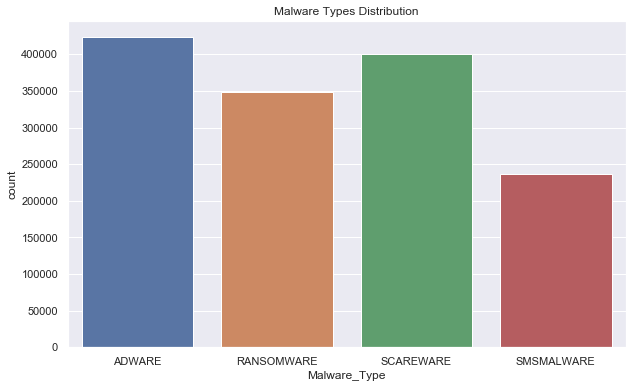

In [94]:
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
ax = sns.countplot(x="Malware_Type", data=df)
plt.title("Malware Types Distribution")
plt.show()


### Distribution of the various classes of each Malware Type

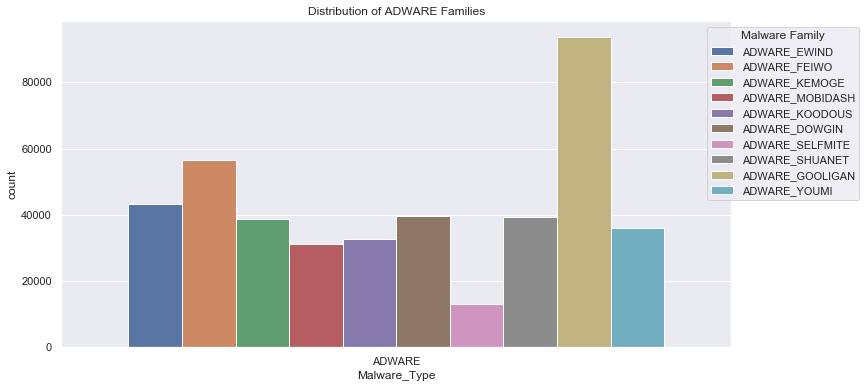

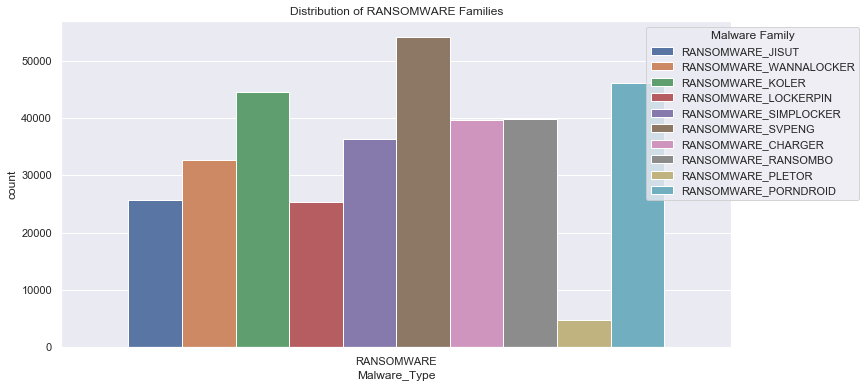

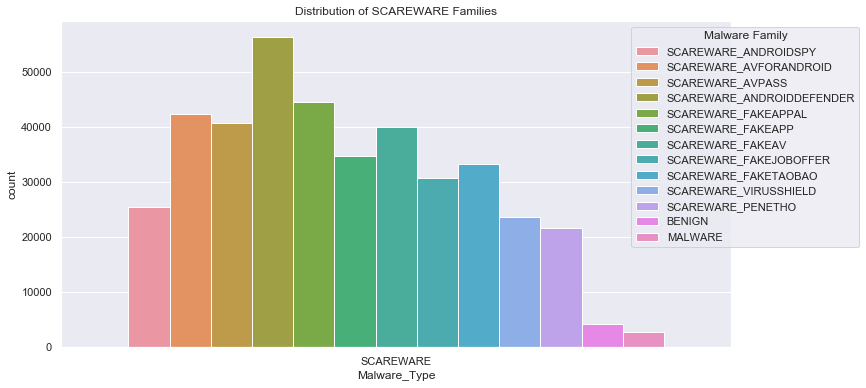

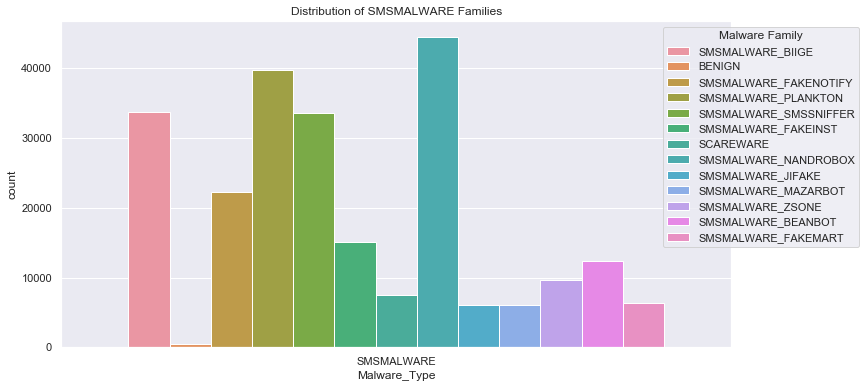

In [95]:
unique_malware_types = df["Malware_Type"].unique()

for malware_type in unique_malware_types:
    plt.figure(figsize=(12, 6))
    sns.set(style="darkgrid")
    
    filtered_data = df[df["Malware_Type"] == malware_type]
    
    ax = sns.countplot(x="Malware_Type", hue="Label", data=filtered_data)
    plt.title(f"Distribution of {malware_type} Families")
    plt.legend(title="Malware Family", loc='upper right', bbox_to_anchor=(1.2, 1))
    plt.show()

### Types of Protocols Involved in the Network Traffic

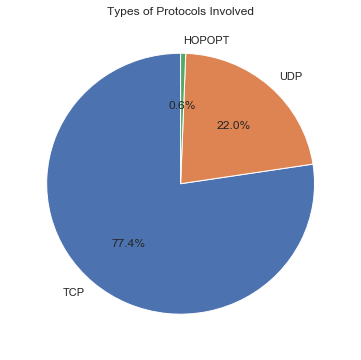

In [96]:
protocol_mapping = {6.0: "TCP", 17.0: "UDP", 0.0: "HOPOPT"}

# Replace protocol numbers with their names
df["Protocol"] = df["Protocol"].replace(protocol_mapping)

# Count the occurrences of each protocol
protocol_counts = df["Protocol"].value_counts()

# Create the pie chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(protocol_counts, labels=protocol_counts.index, autopct='%1.1f%%', startangle=90)
ax.set_title("Types of Protocols Involved")
plt.show()

Understanding our data better, we proceeded with first using a Sample of Dataset. Hence the other notebooks . 
Thank you :)